# CUSTOMER SEGMENTATION PROJECT

## ABSTRACT
___
Attracting new customers is no longer a good strategy for mature businesses since the cost of retaining existing customers is much lower. For this reason, customer churn management becomes instrumental for any industry.

This customer segmentation aims to come up with an integrated customer analytics outline for churn management. 


## OVERVIEW
___

Customer retention is a big issue that occurs when consumers abandon your products and go to another provider. Because of the direct impact on profit margins, firms are now focusing on identifying consumers who are at danger of churning and keeping them through tailored promotional offers since the cost of maintaining existing customers is significantly less than the cost of obtaining a new one.

According to studies, repeat customers seem to be more likely to spend 67 percent more on a company's products and services than new customers. This emphasizes the necessity of knowing customer groups and how it varies across different characteristics. The pharmaceutical industry is one of the sectors that has undergone continuous development throughout the years. Nonetheless, many pharmaceutical companies today with a sizable client base expecting to gain a competitive advantage have not tapped into the huge amounts of data they have, particularly in tackling one of the most well-known challenges, customer turnover.

Churn can be expressed as a level of customer inactivity or disengagement seen over a specific period. This expresses itself in the data in a variety of ways e.g., frequent transactions or unusual drop in average amount spent over time. But how can anyone look for churn indicators? Collecting detailed feedback on the customer's experience might be difficult. For one thing, surveys are both rare and costly. Furthermore, not all customers will bother to reply to it. So, where else can you look for indicators of future client dissatisfaction? The solution consists in identifying early warning indicators from existing data. Advanced machine learning and data science techniques can learn from previous customer behavior and external events that lead to churn and use this knowledge to anticipate the possibility of a churn-like event in the future.

Ref:

[1] (https://www.business.com/articles/returning-customers-spend-67-more-than-new-customers-keep-your-customers-coming-back-with-a-recurring-revenue-sales-model/)



## BUSINESS PROBLEM
___

While everyone recognizes the importance of maintaining existing customers and therefore improving their lifetime value, there is very little companies can do about customer churn when they don't anticipate it coming in the first place. Understanding customer groups and implementing customer targeted incentives becomes critical in this situation, especially when unambiguous consumer feedback is lacking. This enables advertisers and client experience groups to be imaginative and proactive in their offering to the client.
 

This analysis focuses on the spending behavior of clients to identify clusters of clients of XYZ

### Importing the needed packages

In [1]:
import numpy as np
import pandas as pd
import re
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Importing the data set

In [2]:
data = pd.read_excel('customers.xlsx')
data

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code
0,SSPT000001,CUST000070,OANSRL003,EBENEZER,2019-12-04,TEEDAR SYRUP 125ml,2700.0,5.95,2.33420,NIA
1,SSPT000002,CUST000070,OWLCPL001,EBENEZER,2019-12-04,FERRODEX CAPSULES 3 x 10’s,60.0,4.00,2.09560,NIA
2,SSPT000002,CUST000070,OWLSRL005,EBENEZER,2019-12-04,VIROL BLOOD TONIC 200ml,400.0,6.00,2.84330,NIA
3,SSPT000002,CUST000070,OAATBL001,EBENEZER,2019-12-04,RES-Q ANTACID TABLETS 2 x 10’s,100.0,2.05,1.22210,NIA
4,SSPT000002,CUST000070,OCFLZL001,EBENEZER,2019-12-04,SAMALIN LOZENGES 2 x 10’s,500.0,1.90,0.86260,NIA
...,...,...,...,...,...,...,...,...,...,...
168037,SSPT036349,CUST003176,OANSRL003,BENJAMIN,2021-09-29,TEEDAR SYRUP 125ml,120.0,6.50,1.71768,TESANO
168038,SSPT036349,CUST003176,OWLSRL009,BENJAMIN,2021-09-29,DUROL TONIC 300ML,30.0,8.80,3.83014,TESANO
168039,SSPT036349,CUST003176,OWLSRL008,BENJAMIN,2021-09-29,DUROL TONIC 200ML,30.0,6.50,2.72050,TESANO
168040,SSPT036349,CUST003176,OCFSRL002,BENJAMIN,2021-09-29,BELLA COUGH SYRUP 125ml,60.0,5.00,1.57024,TESANO


### Exploring the data 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168042 entries, 0 to 168041
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Document No.               168042 non-null  object 
 1   Sell-to Customer No.       167139 non-null  object 
 2   No.                        167139 non-null  object 
 3   Location Code              167139 non-null  object 
 4   Shipment Date              167161 non-null  object 
 5   Description                167141 non-null  object 
 6   Quantity                   168042 non-null  float64
 7   Unit Price                 168042 non-null  float64
 8   Unit Cost (LCY)            168042 non-null  float64
 9   Shortcut Dimension 2 Code  167265 non-null  object 
dtypes: float64(3), object(7)
memory usage: 12.8+ MB


From the table above, it can be seen that: 
- The data contains 168042   rows and 10 columns
- The table has 2 data types: object and float

##### Checking for missing values

In [4]:
data.isnull().sum()

Document No.                   0
Sell-to Customer No.         903
No.                          903
Location Code                903
Shipment Date                881
Description                  901
Quantity                       0
Unit Price                     0
Unit Cost (LCY)                0
Shortcut Dimension 2 Code    777
dtype: int64

The data contains some missing values. A decision on the missing values will be taken later in the work

- Sell-to Customer No. which is a unique number for every customer contains 903 missing values. Because this number is unique to every customer, I will go ahead and look at why those values are missing

In [5]:
# Checking missing values for Sell-to Customer No.

null_data = data[data['Sell-to Customer No.'].isnull()] 

null_data

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code
1261,SSPT000317,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
1262,SSPT000317,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
1263,SSPT000317,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
1264,SSPT000317,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
1265,SSPT000317,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
166487,SSPT035980,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
166689,SSPT036029,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
167310,SSPT036160,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
167517,SSPT036220,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN


After checking customer ID values that are missing, it can be seen that other corresponding columns were also missing. This means the missing customer IDs will have no effect on the work. I will go ahead and drop the missing customer numbers

In [6]:
### Dropping the rows with empty CustomerID
data.dropna(subset = ['Sell-to Customer No.'], axis = 0, inplace = True)

In [7]:
data.isnull().sum()

Document No.                  0
Sell-to Customer No.          0
No.                           0
Location Code                 0
Shipment Date                 0
Description                  11
Quantity                      0
Unit Price                    0
Unit Cost (LCY)               0
Shortcut Dimension 2 Code     0
dtype: int64

It can be seen that after dropping the rows with empty CustomerIDs, the rows with empty descriptions have also been dropped with the exception of 11 missing values for the description column. This means that the rows that contained empty values were as a result of empty CustomerIDs. 

##### Checking reason for the 11 missing description

In [8]:
# Checking missing values for Sell-to Customer No.

description_null_data = data[data['Description'].isnull()] #.any(axis=1)]

description_null_data

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code
3356,SSPT000792,CUST005248,OWLSRL005,AYIMOGLA,2019-12-13,NaN,10.0,6.00,2.84330,ASHBA
3650,SSPT000873,CUST002240,OWLPDL004,AYIMOGLA,2019-12-05,NaN,250.0,0.46,0.20920,ASHBA
60721,SSPT013315,CUST005186,OANTBL004,DADZIE,2020-07-14,NaN,20.0,2.50,3.32737,WRCR
63337,SSPT013890,CUST005043,RAISSL002,LORD,2020-07-15,NaN,20.0,4.50,2.11160,WRCR
76972,SSPT017121,CUST000023,OCFSRL009,ADZORWU D.,2020-07-16,NaN,50.0,3.20,1.56169,NIA
98578,SSPT021464,CUST000399,OANTBL007,NARH,2020-12-11,NaN,36.0,10.50,4.13152,NIA
114518,SSPT024732,CUST000048,OWLPDL004,EBENEZER,2021-02-18,NaN,2000.0,0.46,0.34608,NIA
125644,SSPT027283,CUST002930,OANTBL008,GAISE A.,2021-03-26,NaN,18.0,8.08,5.11727,TESANO
133330,SSPT029003,CUST002528,OAASSL002,AMOAH C.,2021-04-27,NaN,31.0,6.00,2.31718,TESANO
133351,SSPT029009,CUST000266,OANSRL006,GAISE A.,2021-04-16,NaN,60.0,3.80,2.07704,NIA


Notice that even though the descriptions were not given, we still have the Product No. which tells us what product it is.
Since this is a customer segmentation project, descriptions will not be the main focus of the study.

##### Since this is a segmentation project, I do not want a situation where there will be duplicates in the data. I will therefore go ahead to drop any duplicates in the data since the duplicate represents the same transaction done by the same customer at the same time.

In [9]:
# Checking for duplicates in the data

data.duplicated().sum()

400

After checking the data, it can be seen that the data has 400 duplicated entries. I will therefore go ahead to delete the duplicates

In [10]:
# Dropping the duplicates in the data
400
data.drop_duplicates(inplace = True)

##### Now that our data is clean of duplicates and missing values, let us understand the individual columns of the data and look at the type of input under each column

In [11]:
data.head()

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code
0,SSPT000001,CUST000070,OANSRL003,EBENEZER,2019-12-04,TEEDAR SYRUP 125ml,2700.0,5.95,2.3342,NIA
1,SSPT000002,CUST000070,OWLCPL001,EBENEZER,2019-12-04,FERRODEX CAPSULES 3 x 10’s,60.0,4.00,2.0956,NIA
2,SSPT000002,CUST000070,OWLSRL005,EBENEZER,2019-12-04,VIROL BLOOD TONIC 200ml,400.0,6.00,2.8433,NIA
3,SSPT000002,CUST000070,OAATBL001,EBENEZER,2019-12-04,RES-Q ANTACID TABLETS 2 x 10’s,100.0,2.05,1.2221,NIA
4,SSPT000002,CUST000070,OCFLZL001,EBENEZER,2019-12-04,SAMALIN LOZENGES 2 x 10’s,500.0,1.90,0.8626,NIA


 - Document No : The Document number is a number given to each transaction at a particular time.
 - Sell-to Customer No. : The customer ID is a unique number given to each customer. Note that it is unique for every customer.
 - No. : The number given to each product. This number is unique to a particular product.
 - Location Code : This shows the sales persons for the geographical location of all customers involved in the transaction
 - Shipment Date : This shows the date on which each transaction is performed.
 - Description : The description gives the name of the individual products.
 - Quantity : This shows the amount or number of products purchased for every transaction.
 - Unit Price : The unit price shows the price of every product
 - Unit Price : The unit cost shows the cost of production for every product
 - Shortcut Dimension 2 Code : This shows the geographical location of all customers involved in the transaction


###### Looking at variations in customer transactions

In [12]:
customertrans = pd.DataFrame(data.groupby(['Sell-to Customer No.','Document No.'], as_index=False)['No.'].count())
customertrans[:15]

,Sell-to Customer No.,Document No.,No.
0,CUST000001,SSPT026206,11
1,CUST000003,SSPT032638,12
2,CUST000004,SSPT007307,2
3,CUST000004,SSPT007316,13
4,CUST000004,SSPT010777,1
5,CUST000004,SSPT010784,1
6,CUST000004,SSPT010822,1
7,CUST000004,SSPT010825,5
8,CUST000004,SSPT015173,3
9,CUST000004,SSPT018901,4


From the table, it is evident that some customers patronize services of XYZ more than others. Eg: Customer CUST000003 bought 12 different products as compared to customer CUST000001 who bought 11 products




In [13]:
customertrans.nlargest(n=10, columns=['No.'])

,Sell-to Customer No.,Document No.,No.
36302,DASPH000108,SSPT022842,67
35924,CUST005382,SSPT018979,39
36314,DASPH000336,SSPT022843,38
36319,DASPH000344,SSPT022837,36
36322,DASPH000348,SSPT022839,36
22844,CUST003736,SSPT030615,35
36303,DASPH000211,SSPT022840,35
36328,DASPH000630,SSPT022836,34
30049,CUST005002,SSPT018566,32
36301,DASPH000098,SSPT022838,31


##### I will now go ahead to find the number of unique products, transactions, customers, location and sales reps in the data set and store it as a data frame called unique_info

In [14]:
unique_info = pd.DataFrame([{'Products': data['No.'].nunique(),    
               'Transactions': data['Document No.'].nunique(),
               'Customers': data['Sell-to Customer No.'].nunique(),
               'Location': data['Shortcut Dimension 2 Code'].nunique(),
               'Sales Persons': data['Location Code'].nunique(),
              }], columns = ['Products', 'Transactions', 'Customers','Location','Sales Persons'], index = ['Number'])
unique_info

,Products,Transactions,Customers,Location,Sales Persons
Number,94,36331,1977,7,41


From the table above, it can be seen that the data contains information about 1977 unique customers, involved in 36331 transactions of 94 unique products, across 7 major locations. 

###### Next, I will look at the sales persons to know how the transactions are spread across these sales persons

In [15]:
sales_person_location = pd.DataFrame(data['Location Code'].value_counts())
sales_person_location['Percentage'] = round(pd.DataFrame((data['Location Code'].value_counts()/len(data))*100),4)
sales_person_location

,Location Code,Percentage
LORD,18081,10.8439
DADZIE,11536,6.9186
VORMAWOR C,11420,6.8490
AMOAH C.,11352,6.8082
ERNESTINA,9321,5.5902
OTOO,8556,5.1314
ANASTASIA,8287,4.9700
OWUSU B.,7993,4.7937
FELIX,7747,4.6462
JAWAD,7488,4.4909


From the table, we can see that the sales person responsible for most of the transacion is Lord with 18081 (10.84%), followed by Dadzie with 11536 (6.92%), and VORMAWOR 11420 (6.85%).
DUEVE had the least transaction, constituting only 2 of the transactions with an approximate percentage of 0.0012. 

### Looking at the distibution of customers in the major supply locations 

In [16]:
location = pd.DataFrame(data['Shortcut Dimension 2 Code'].value_counts())
location['Percentage'] = round(pd.DataFrame((data['Shortcut Dimension 2 Code'].value_counts()/len(data))*100),4)
location

,Shortcut Dimension 2 Code,Percentage
ASHBA,52692,31.6015
WRCR,42998,25.7876
TESANO,32471,19.4741
NIA,22395,13.4312
NRUEW,16058,9.6306
MOH,76,0.0456
VET,49,0.0294


array([<AxesSubplot:ylabel='Shortcut Dimension 2 Code'>], dtype=object)

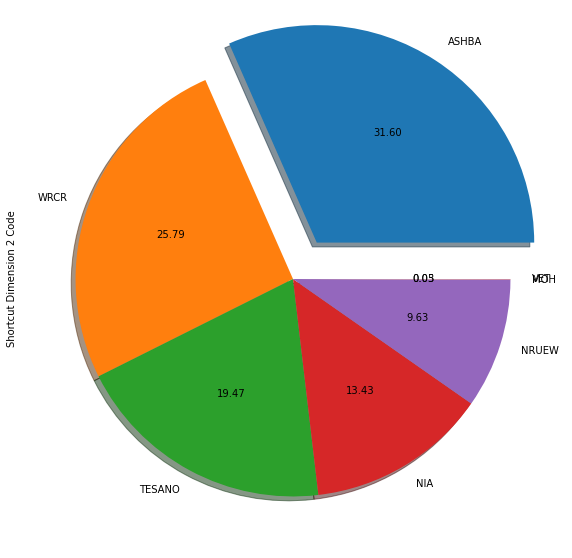

In [17]:
location['Shortcut Dimension 2 Code'].plot(kind= 'pie', subplots = True, figsize=(30,10), shadow = True, explode = (0.2,0,0,0,0,0,0), autopct='%1.2f')

Looking at the distribution of locations,  ASHBA has the largest market in the database

In [18]:
customertrans.describe()

,No.
count,36331.000000
mean,4.589442
std,4.050684
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,67.000000


From the table, the minimum number of different products purchased per transaction is 1 and the highest was 67

### Time Cohort 

 - This is done to analyze the customers in terms of their first to last transaction date. Doing this will help to analyse the customer retention rate of XYZ
    

Here, I define a function that will extract the Shipment Date and group the first transaction date and last transaction date for each customer.
I will also create 2 new columns 'FirstTrans' and 'RecentTrans'. 
 - FirstTrans represents the first day a particular customer initiated their very first transaction
 - RecentTrans represents the most recent day a particular customer initiated their last transaction   

In [19]:
# Changing InvoiceDate from object data type to datetime data type
data['Shipment Date'] =  pd.to_datetime(data['Shipment Date'])

In [20]:
# Defining the function and viewing the first 5 rows

def get_month(x) : return dt.datetime(x.year,x.month,1)
data['RecentTrans'] = data['Shipment Date'].apply(get_month)
grouping = data.groupby('Sell-to Customer No.')['RecentTrans']
data['FirstTrans'] = grouping.transform('min')
data.head()

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code,RecentTrans,FirstTrans
0,SSPT000001,CUST000070,OANSRL003,EBENEZER,2019-12-04,TEEDAR SYRUP 125ml,2700.0,5.95,2.3342,NIA,2019-12-01,2019-12-01
1,SSPT000002,CUST000070,OWLCPL001,EBENEZER,2019-12-04,FERRODEX CAPSULES 3 x 10’s,60.0,4.00,2.0956,NIA,2019-12-01,2019-12-01
2,SSPT000002,CUST000070,OWLSRL005,EBENEZER,2019-12-04,VIROL BLOOD TONIC 200ml,400.0,6.00,2.8433,NIA,2019-12-01,2019-12-01
3,SSPT000002,CUST000070,OAATBL001,EBENEZER,2019-12-04,RES-Q ANTACID TABLETS 2 x 10’s,100.0,2.05,1.2221,NIA,2019-12-01,2019-12-01
4,SSPT000002,CUST000070,OCFLZL001,EBENEZER,2019-12-04,SAMALIN LOZENGES 2 x 10’s,500.0,1.90,0.8626,NIA,2019-12-01,2019-12-01


In [21]:
grouping.head(20)

0        2019-12-01
1        2019-12-01
2        2019-12-01
3        2019-12-01
4        2019-12-01
            ...    
167542   2021-09-01
167578   2021-09-01
167934   2021-09-01
167935   2021-09-01
167981   2021-09-01
Name: RecentTrans, Length: 33941, dtype: datetime64[ns]

In [22]:
# Viewing the last 5 rows

data.tail()

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code,RecentTrans,FirstTrans
168037,SSPT036349,CUST003176,OANSRL003,BENJAMIN,2021-09-29,TEEDAR SYRUP 125ml,120.0,6.5,1.71768,TESANO,2021-09-01,2020-01-01
168038,SSPT036349,CUST003176,OWLSRL009,BENJAMIN,2021-09-29,DUROL TONIC 300ML,30.0,8.8,3.83014,TESANO,2021-09-01,2020-01-01
168039,SSPT036349,CUST003176,OWLSRL008,BENJAMIN,2021-09-29,DUROL TONIC 200ML,30.0,6.5,2.72050,TESANO,2021-09-01,2020-01-01
168040,SSPT036349,CUST003176,OCFSRL002,BENJAMIN,2021-09-29,BELLA COUGH SYRUP 125ml,60.0,5.0,1.57024,TESANO,2021-09-01,2020-01-01
168041,SSPT036349,CUST003176,OANSRL002,BENJAMIN,2021-09-29,PARACETAMOL ELIXIR 120MG/5ML,60.0,3.4,1.56180,TESANO,2021-09-01,2020-01-01


In [23]:
data[data['Document No.']=="SSPT036349"]

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code,RecentTrans,FirstTrans
168036,SSPT036349,CUST003176,OCFSRL010,BENJAMIN,2021-09-29,LINCTUS JUNIOR COUGH SYRUP 100ml,25.0,3.2,1.51475,TESANO,2021-09-01,2020-01-01
168037,SSPT036349,CUST003176,OANSRL003,BENJAMIN,2021-09-29,TEEDAR SYRUP 125ml,120.0,6.5,1.71768,TESANO,2021-09-01,2020-01-01
168038,SSPT036349,CUST003176,OWLSRL009,BENJAMIN,2021-09-29,DUROL TONIC 300ML,30.0,8.8,3.83014,TESANO,2021-09-01,2020-01-01
168039,SSPT036349,CUST003176,OWLSRL008,BENJAMIN,2021-09-29,DUROL TONIC 200ML,30.0,6.5,2.72050,TESANO,2021-09-01,2020-01-01
168040,SSPT036349,CUST003176,OCFSRL002,BENJAMIN,2021-09-29,BELLA COUGH SYRUP 125ml,60.0,5.0,1.57024,TESANO,2021-09-01,2020-01-01
168041,SSPT036349,CUST003176,OANSRL002,BENJAMIN,2021-09-29,PARACETAMOL ELIXIR 120MG/5ML,60.0,3.4,1.56180,TESANO,2021-09-01,2020-01-01


##### After extracting the first transaction and most recent transaction dates, I will go ahead to look at the lenght (in months) between their first month of transaction and their most recent month of transaction

Here, I will create a new column (Month_Diff_in_Trans) which will represent the month difference from the first transaction date to the last transaction date
 - I will calculate this using the RecentTrans and FirstTrans columns created earlier
 
This is the logic I will use in counting the months 
 - I will count the number of months as 0 if the FirstTrans and RecentTrans have the same date. I will also count the number of months as 1 if for example FirstTrans is 1st January and RecentTrans is 1st February. 
 Therefore every 1st of a current month to the 1st of the next month is one month in addition

In [24]:
def get_date_int(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year,month,day

In [25]:
invoice_year,invoice_month, _ = get_date_int(data, 'RecentTrans')
cohort_year, cohort_month, _ = get_date_int(data, 'FirstTrans')
years_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
data['Month_Diff_in_Trans'] = years_diff*12 + month_diff 
data.head()

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code,RecentTrans,FirstTrans,Month_Diff_in_Trans
0,SSPT000001,CUST000070,OANSRL003,EBENEZER,2019-12-04,TEEDAR SYRUP 125ml,2700.0,5.95,2.3342,NIA,2019-12-01,2019-12-01,0
1,SSPT000002,CUST000070,OWLCPL001,EBENEZER,2019-12-04,FERRODEX CAPSULES 3 x 10’s,60.0,4.00,2.0956,NIA,2019-12-01,2019-12-01,0
2,SSPT000002,CUST000070,OWLSRL005,EBENEZER,2019-12-04,VIROL BLOOD TONIC 200ml,400.0,6.00,2.8433,NIA,2019-12-01,2019-12-01,0
3,SSPT000002,CUST000070,OAATBL001,EBENEZER,2019-12-04,RES-Q ANTACID TABLETS 2 x 10’s,100.0,2.05,1.2221,NIA,2019-12-01,2019-12-01,0
4,SSPT000002,CUST000070,OCFLZL001,EBENEZER,2019-12-04,SAMALIN LOZENGES 2 x 10’s,500.0,1.90,0.8626,NIA,2019-12-01,2019-12-01,0


In [26]:
data.tail()

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code,RecentTrans,FirstTrans,Month_Diff_in_Trans
168037,SSPT036349,CUST003176,OANSRL003,BENJAMIN,2021-09-29,TEEDAR SYRUP 125ml,120.0,6.5,1.71768,TESANO,2021-09-01,2020-01-01,20
168038,SSPT036349,CUST003176,OWLSRL009,BENJAMIN,2021-09-29,DUROL TONIC 300ML,30.0,8.8,3.83014,TESANO,2021-09-01,2020-01-01,20
168039,SSPT036349,CUST003176,OWLSRL008,BENJAMIN,2021-09-29,DUROL TONIC 200ML,30.0,6.5,2.72050,TESANO,2021-09-01,2020-01-01,20
168040,SSPT036349,CUST003176,OCFSRL002,BENJAMIN,2021-09-29,BELLA COUGH SYRUP 125ml,60.0,5.0,1.57024,TESANO,2021-09-01,2020-01-01,20
168041,SSPT036349,CUST003176,OANSRL002,BENJAMIN,2021-09-29,PARACETAMOL ELIXIR 120MG/5ML,60.0,3.4,1.56180,TESANO,2021-09-01,2020-01-01,20


Understanding the Month_Diff_In_Trans values

- A Month_Diff_In_Trans vaue of 0 means that after the first month of transaction, the particular customer has not made any other transaction.

- A Month_Diff_In_Trans vaue of 6 means that after the first month of transaction, the particular customer had a difference of 6 months between their first transaction and most recent transaction.

##### Now let us look at the instances of first transaction dates and the number of month difference in between it and the most recent transaction 

In [27]:
# Grouping the customers to know the number of customers within every Month_Diff_in_Trans

grouping = data.groupby(['FirstTrans', 'Month_Diff_in_Trans'])
cohort_data = grouping['Sell-to Customer No.'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='FirstTrans',
                                  columns ='Month_Diff_in_Trans',
                                  values= 'Sell-to Customer No.')
cohort_counts

Month_Diff_in_Trans,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
FirstTrans,,,,,,,,,,,,,,,,,,,,,
2019-10-01,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0
2019-12-01,796.0,493.0,568.0,528.0,533.0,454.0,529.0,558.0,517.0,488.0,...,400.0,476.0,489.0,482.0,445.0,454.0,429.0,438.0,245.0,4.0
2020-01-01,370.0,170.0,214.0,172.0,165.0,201.0,194.0,171.0,183.0,177.0,...,168.0,183.0,177.0,155.0,166.0,146.0,135.0,78.0,NaN,NaN
2020-02-01,233.0,89.0,81.0,77.0,103.0,85.0,92.0,89.0,80.0,76.0,...,92.0,80.0,95.0,69.0,79.0,70.0,37.0,NaN,NaN,NaN
2020-03-01,128.0,38.0,41.0,44.0,47.0,39.0,53.0,42.0,38.0,35.0,...,50.0,40.0,40.0,36.0,29.0,12.0,NaN,NaN,NaN,NaN
2020-04-01,50.0,13.0,13.0,15.0,14.0,14.0,14.0,17.0,17.0,10.0,...,13.0,13.0,13.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN
2020-05-01,49.0,13.0,9.0,11.0,10.0,8.0,8.0,7.0,4.0,12.0,...,5.0,6.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-01,42.0,9.0,8.0,13.0,10.0,8.0,10.0,9.0,10.0,9.0,...,10.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01,45.0,16.0,18.0,13.0,11.0,13.0,7.0,9.0,7.0,8.0,...,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#cohort_counts.to_excel(r'C:\Users\User\Desktop\AKWASI\DAX data\customercohort.xlsx')

Note that every unique FirstTrans date shows a particular cohort of customers who made their first transaction on that date. For example, the 796 of 2019-12-01 shows that 796 customers had that date(2019-12-01) to be the first date of doing a transaction with XYZ 

Conclusions from the table
- The first transaction month and last transaction month was 2019-10-01 and 2021-09-01 respectively
- The NaN values are there because the current month to the last transaction month is reducing as the months progresses

Note that the bigger the values are as the months progresses, the better it is for XYZ. This is because it means that even though the customers are not buying frequently, they still come back even after a long time to make their pruchases from XYZ. 

In essence, the table shows how many customers have returned in the subsequent months

###### Let us visualize this to put it into better perspective

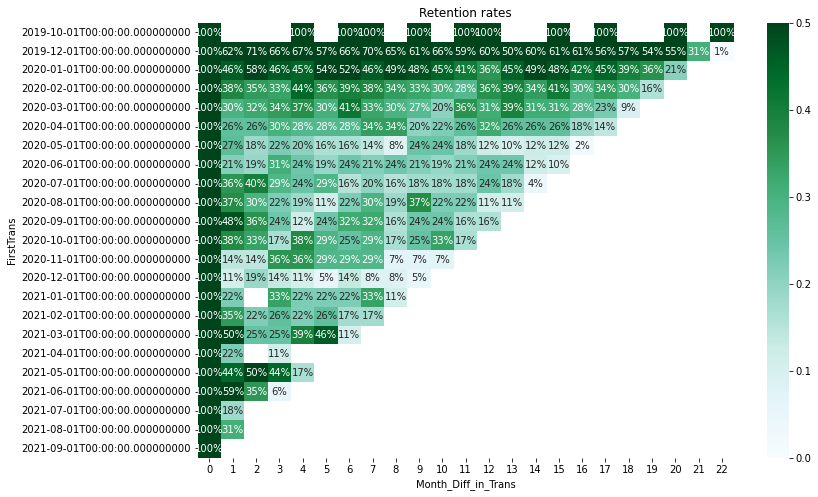

In [29]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100

plt.figure(figsize=(12,8))
plt.title('Retention rates')
sns.heatmap(data=retention, annot=True,fmt='.0%', vmin=0.0,vmax=0.5,cmap = 'BuGn')
plt.show()

The percentages show the number of customers in the particular cohort that came back after the subsequent months.

For example, in the first row that corresponds to 2019-12-01, 59% of customers who made their first transaction on that day patronizedd XYZ even after 11 months. Even though 59% is a fair number, the company must consider ways that will improve the customer retention rates.

#### In order to make improvements to services that will increase customer retention, I will go deeper to understand the different customer behaviours identified in the data. By understanding the different customer behaviour, the company can bring interventions that are more targeted to the spending beaviour of customers.

### Using other metrics to analyze customer behaviour

- Recency(R) - Measures the recent last purchase of each customer
- Frquency(F) - Measures a customer's purchase in the last 12 months
- AmountPaid(M) - Measures how much the customer spent in the last 12 months

###### Now let us calculate the amount paid for every transaction. We will do this by multiplying the quantity requested by the unit price

In [30]:
#### Viewing the data again

data.head()

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code,RecentTrans,FirstTrans,Month_Diff_in_Trans
0,SSPT000001,CUST000070,OANSRL003,EBENEZER,2019-12-04,TEEDAR SYRUP 125ml,2700.0,5.95,2.3342,NIA,2019-12-01,2019-12-01,0
1,SSPT000002,CUST000070,OWLCPL001,EBENEZER,2019-12-04,FERRODEX CAPSULES 3 x 10’s,60.0,4.00,2.0956,NIA,2019-12-01,2019-12-01,0
2,SSPT000002,CUST000070,OWLSRL005,EBENEZER,2019-12-04,VIROL BLOOD TONIC 200ml,400.0,6.00,2.8433,NIA,2019-12-01,2019-12-01,0
3,SSPT000002,CUST000070,OAATBL001,EBENEZER,2019-12-04,RES-Q ANTACID TABLETS 2 x 10’s,100.0,2.05,1.2221,NIA,2019-12-01,2019-12-01,0
4,SSPT000002,CUST000070,OCFLZL001,EBENEZER,2019-12-04,SAMALIN LOZENGES 2 x 10’s,500.0,1.90,0.8626,NIA,2019-12-01,2019-12-01,0


##### Calculating the Amount paid for every transaction

In [31]:
data['AmountPaid'] = round(data['Quantity']*data['Unit Price'],2)
data.head()

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code,RecentTrans,FirstTrans,Month_Diff_in_Trans,AmountPaid
0,SSPT000001,CUST000070,OANSRL003,EBENEZER,2019-12-04,TEEDAR SYRUP 125ml,2700.0,5.95,2.3342,NIA,2019-12-01,2019-12-01,0,16065.0
1,SSPT000002,CUST000070,OWLCPL001,EBENEZER,2019-12-04,FERRODEX CAPSULES 3 x 10’s,60.0,4.00,2.0956,NIA,2019-12-01,2019-12-01,0,240.0
2,SSPT000002,CUST000070,OWLSRL005,EBENEZER,2019-12-04,VIROL BLOOD TONIC 200ml,400.0,6.00,2.8433,NIA,2019-12-01,2019-12-01,0,2400.0
3,SSPT000002,CUST000070,OAATBL001,EBENEZER,2019-12-04,RES-Q ANTACID TABLETS 2 x 10’s,100.0,2.05,1.2221,NIA,2019-12-01,2019-12-01,0,205.0
4,SSPT000002,CUST000070,OCFLZL001,EBENEZER,2019-12-04,SAMALIN LOZENGES 2 x 10’s,500.0,1.90,0.8626,NIA,2019-12-01,2019-12-01,0,950.0


In [32]:
data['AmountPaid'].describe() 

count    166739.000000
mean        768.195575
std        3329.229572
min           0.000000
25%          63.000000
50%         142.000000
75%         380.000000
max      282464.000000
Name: AmountPaid, dtype: float64

On the average, customers spend 768.196 cedis on every product transaction with XYZ. 

###### Calculating RFM values

In [33]:
snapshot_date = max(data['Shipment Date'] + datetime.timedelta(days=1))
snapshot_date


Timestamp('2021-10-02 00:00:00')

In [34]:
datamart = data.groupby(['Sell-to Customer No.']).agg({'Shipment Date':lambda x: (snapshot_date - x.max()).days,
                                              'Document No.': 'count',
                                              'AmountPaid':'sum'})
## renaming columns
datamart.rename(columns={'Shipment Date':'Recency',
                        'Document No.': 'Frequency'
                        },inplace=True)
datamart.head()

,Recency,Frequency,AmountPaid
Sell-to Customer No.,,,
CUST000001,199,11,175.70
CUST000003,86,12,478.00
CUST000004,57,101,450433.87
CUST000005,8,654,203114.15
CUST000007,276,84,124786.30


In [35]:
cust = data[data['Sell-to Customer No.']=='CUST000001']
cust

,Document No.,Sell-to Customer No.,No.,Location Code,Shipment Date,Description,Quantity,Unit Price,Unit Cost (LCY),Shortcut Dimension 2 Code,RecentTrans,FirstTrans,Month_Diff_in_Trans,AmountPaid
120952,SSPT026206,CUST000001,OHMSRL001,LORD,2021-03-17,FERRODEX SYRUP 200ml,5.0,5.23,2.30052,WRCR,2021-03-01,2021-03-01,0,26.15
120953,SSPT026206,CUST000001,OCFSRL004,LORD,2021-03-17,SAMALIN JUNIOR COUGH SYRUP 125ml,5.0,3.80,1.48102,WRCR,2021-03-01,2021-03-01,0,19.00
120954,SSPT026206,CUST000001,OCFLZL001,LORD,2021-03-17,SAMALIN LOZENGES 2 x 10’s,5.0,1.90,1.18225,WRCR,2021-03-01,2021-03-01,0,9.50
120955,SSPT026206,CUST000001,OCFSRL007,LORD,2021-03-17,KOFFEX ADULT COUGH SYRUP 125ml,5.0,4.09,1.80718,WRCR,2021-03-01,2021-03-01,0,20.45
120956,SSPT026206,CUST000001,OWLPDL005,LORD,2021-03-17,DANNEX ORS 25’s,25.0,0.43,0.34807,WRCR,2021-03-01,2021-03-01,0,10.75
120957,SSPT026206,CUST000001,OWLPDL004,LORD,2021-03-17,DANNEX ORS ORANGE 25’s,25.0,0.44,0.34602,WRCR,2021-03-01,2021-03-01,0,11.00
120958,SSPT026206,CUST000001,OCFSRL010,LORD,2021-03-17,LINCTUS JUNIOR COUGH SYRUP 100ml,5.0,2.85,1.42205,WRCR,2021-03-01,2021-03-01,0,14.25
120959,SSPT026206,CUST000001,OCFSRL009,LORD,2021-03-17,LINCTUS ADULT COUGH SYRUP 100ml,5.0,3.18,1.52256,WRCR,2021-03-01,2021-03-01,0,15.90
120960,SSPT026206,CUST000001,OWLPDL001,LORD,2021-03-17,GLUCO-NAF C ORANGE 400g,2.0,6.75,5.34887,WRCR,2021-03-01,2021-03-01,0,13.50
120961,SSPT026206,CUST000001,OWLSRL001,LORD,2021-03-17,AYRTON MULTIVITAMIN SYRUP 125ML,5.0,4.09,2.03125,WRCR,2021-03-01,2021-03-01,0,20.45


In [36]:
cust['AmountPaid'].sum()

175.7

Note that the lower the value for Recency, the better. If the value for Recency is small, it shows that the interval between the customer's most recent transaction and the maximum shipment date is small, indicating high patronage. However, the higher the Frequency and AmountPaid, the better.

To make understanding easier, I will create a measure for the 3 metrics (Recency, Frequency and AmountPaid ) and name it as R,F and A



#### Creating the measure for Recency and naming it as R

In [37]:
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(datamart['Recency'], 4 , labels = r_labels)
datamart = datamart.assign(R=r_quartiles.values)
datamart.head()

,Recency,Frequency,AmountPaid,R
Sell-to Customer No.,,,,
CUST000001,199,11,175.70,1
CUST000003,86,12,478.00,2
CUST000004,57,101,450433.87,3
CUST000005,8,654,203114.15,4
CUST000007,276,84,124786.30,1


#### Creating the measure for Frequency and AmountPaid and naming it as F and M

In [38]:
f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'], 4 , labels = f_labels)
m_quartiles = pd.qcut(datamart['AmountPaid'], 4 , labels = m_labels)
datamart = datamart.assign(F=f_quartiles.values)
datamart = datamart.assign(M=m_quartiles.values)
datamart.head()

,Recency,Frequency,AmountPaid,R,F,M
Sell-to Customer No.,,,,,,
CUST000001,199,11,175.70,1,1,1
CUST000003,86,12,478.00,2,1,1
CUST000004,57,101,450433.87,3,3,4
CUST000005,8,654,203114.15,4,4,4
CUST000007,276,84,124786.30,1,3,4


Now I will create a score (RFM_score) that will aggregate the measures Recency,Frequency and Amount paid. This will make comaparison easier for better understanding. Note that the higher the RFM_score, the better the benefits the retail shop gains from that particular customer.



In [39]:
def join_rfm(x): return str(x['R'])+str(x['F'])+str(x['M'])
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
datamart.head()

,Recency,Frequency,AmountPaid,R,F,M,RFM_Score
Sell-to Customer No.,,,,,,,
CUST000001,199,11,175.70,1,1,1,3
CUST000003,86,12,478.00,2,1,1,4
CUST000004,57,101,450433.87,3,3,4,10
CUST000005,8,654,203114.15,4,4,4,12
CUST000007,276,84,124786.30,1,3,4,8


After viewing the first 5 rows of the data, it can be seen that customer CUST000005 has a score of 12 indicating that this customer patronizes XYZ more often as compared to customer CUST000001 who has a score of 3.

Note : The highest attainable score is 12 and the lowest score is 3

#### Looking at the ranges of the RFM score in the whole dataset

In [40]:
datamart['RFM_Score'].describe()

count    1977.000000
mean        7.506323
std         2.841118
min         3.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: RFM_Score, dtype: float64

After viewing the ranges, it is realised that 50% customers attained a score of 8 (out of possible 12). This is fairly good but with more interventions that will attract customers, the score can be increased


#### Viewing customers who had a 100% score. 

In [41]:
datamart[datamart['RFM_Score']==12]

,Recency,Frequency,AmountPaid,R,F,M,RFM_Score
Sell-to Customer No.,,,,,,,
CUST000005,8,654,203114.15,4,4,4,12
CUST000020,22,383,31696.56,4,4,4,12
CUST000026,32,224,252565.00,4,4,4,12
CUST000028,16,186,46928.67,4,4,4,12
CUST000046,36,124,65323.74,4,4,4,12
...,...,...,...,...,...,...,...
CUST005263,1,3249,1372170.39,4,4,4,12
CUST005268,8,2569,954353.95,4,4,4,12
CUST005270,8,1163,331914.43,4,4,4,12


After checking for the customers with the highest RFM_Score (12) we realise that there are 160 customers out of 1977 customers who have very high RFM scores. XYZ can decide to award these 160 customers as a way of improving their customer retention abilities.

#### Viewing customers with lowest scores. 

In [42]:
datamart[datamart['RFM_Score']==3]

,Recency,Frequency,AmountPaid,R,F,M,RFM_Score
Sell-to Customer No.,,,,,,,
CUST000001,199,11,175.7,1,1,1,3
CUST000033,507,3,735.8,1,1,1,3
CUST000038,481,1,55.0,1,1,1,3
CUST000040,619,1,250.0,1,1,1,3
CUST000078,438,1,912.0,1,1,1,3
...,...,...,...,...,...,...,...
DASPH000323,275,4,1522.2,1,1,1,3
DASPH000340,275,13,2305.7,1,1,1,3
DASPH000349,275,2,28.1,1,1,1,3


On the other hand, there are 246 customers who have very low RFM scores (3). XYZ can decide to target these customers and introduce some attractive deals that will improve the transaction rates of these customers.

In [43]:
datamart.groupby('RFM_Score').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'AmountPaid':['mean','count']}).round(1)

Recency Frequency AmountPaid      
             mean      mean       mean count
RFM_Score                                   
3           435.6       8.4     1145.3   246
4           280.8      18.2     3059.4   164
5           179.4      26.5     5614.8   139
6           143.5      33.3     9280.8   191
7           112.4      48.6    21694.7   193
8            71.9      62.6    19198.5   239
9            63.2      97.9    27872.6   225
10           43.4     112.8    52879.6   223
11           34.6     144.7   118590.1   197
12           19.7     322.6   465939.8   160

The table above shows the mean of Recency, Frequency and AmountPaid for the respective RFM_Scores.
This gives an insight into the number of customers for every RFM scores

I have explored some ways of segmenting the customers and recognized some customers who are doing well and those whose transaction rates are low

Now let us use the K-Means clustering to make clusters from the data for more insights

### Data Preprocessing for K-Means

Assumptions to satisfy in order to use K-Means 
 - Symmetric distribution of variables (not skewed)
 - Variables with same average values (equal means)
 - Variables with same variance (equal variance)
 
Now I will explore the data to make sure the assumptions are met in order to apply the k-means clustering

In [44]:
KMeans_data=datamart[['Recency', 'Frequency','AmountPaid']]
KMeans_data

,Recency,Frequency,AmountPaid
Sell-to Customer No.,,,
CUST000001,199,11,175.70
CUST000003,86,12,478.00
CUST000004,57,101,450433.87
CUST000005,8,654,203114.15
CUST000007,276,84,124786.30
...,...,...,...
DASPH000357,275,29,109603.72
DASPH000359,235,23,2466.11
DASPH000630,275,34,15892.80


###### Symmetric distribution of variables

In [45]:
KMeans_data.describe()

,Recency,Frequency,AmountPaid
count,1977.000000,1977.000000,1.977000e+03
mean,140.756196,84.339403,6.478916e+04
std,159.790204,160.817152,3.202400e+05
min,1.000000,1.000000,2.810000e+01
25%,37.000000,22.000000,3.840000e+03
50%,66.000000,57.000000,9.694380e+03
75%,185.000000,101.000000,2.628788e+04
max,670.000000,3249.000000,7.420857e+06


#### Before I can use the K-means clustering, the data must meet certain conditions. I am therefore going to check if these conditions are met.
#### The conditions are 

 - Equal means 

- Equal variance

#### Checking for the stated assumptions

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


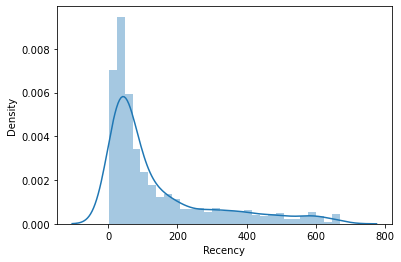

In [46]:
sns.distplot(KMeans_data['Recency'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


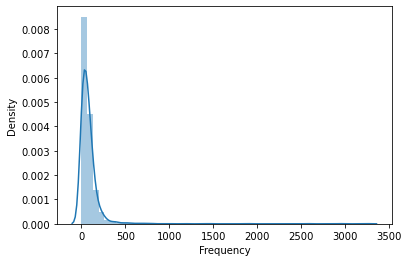

In [47]:
sns.distplot(KMeans_data['Frequency'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


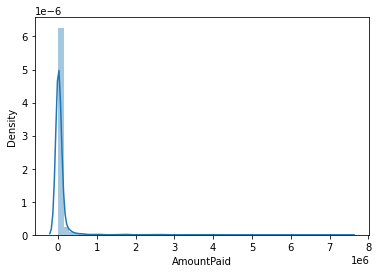

In [48]:
sns.distplot(KMeans_data['AmountPaid'])
plt.show()

It can be seen that the metrics are skewed to one side and do not meet the required conditions for the KMeans clustering. I will therefore transform the data using the log function

#### Transforming the data using the log function

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


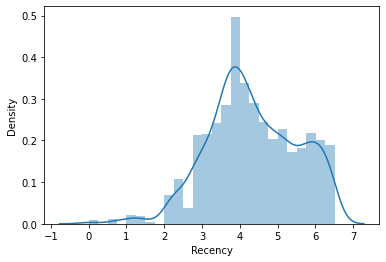

In [49]:
frequency_log = np.log(KMeans_data['Recency'])
sns.distplot(frequency_log)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


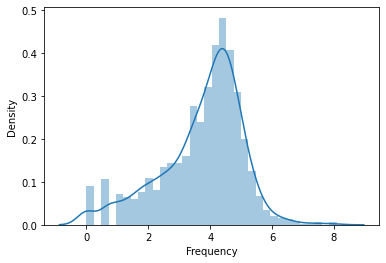

In [50]:
frequency_log = np.log(KMeans_data['Frequency'])
sns.distplot(frequency_log)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


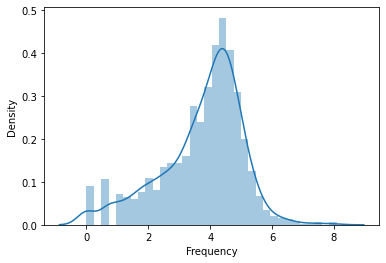

In [51]:
AmountPaid_log = np.log(KMeans_data['AmountPaid'])
sns.distplot(frequency_log)
plt.show()

It can now be seen that the data is better spread along the axis now, getting it closer to meeting the required conditions

### Centering and Scaling data

#### I will now view the means and the variance to make sure they are really equal or almost equal

In [52]:
KMeans_data

,Recency,Frequency,AmountPaid
Sell-to Customer No.,,,
CUST000001,199,11,175.70
CUST000003,86,12,478.00
CUST000004,57,101,450433.87
CUST000005,8,654,203114.15
CUST000007,276,84,124786.30
...,...,...,...
DASPH000357,275,29,109603.72
DASPH000359,235,23,2466.11
DASPH000630,275,34,15892.80


#### Viewing the mean

In [53]:
KMeans_data= KMeans_data.astype(np.int8)

In [54]:
datamart_centered = KMeans_data-KMeans_data.mean()
datamart_centered.describe().round(2)

,Recency,Frequency,AmountPaid
count,1977.00,1977.00,1977.00
mean,0.00,0.00,-0.00
std,61.39,58.50,73.64
min,-151.57,-158.73,-126.19
25%,-14.57,-24.73,-64.19
50%,13.43,3.27,1.81
75%,40.43,42.27,62.81
max,103.43,96.27,128.81


It can be seen that the means are all centered around the same value 0. The assumption for equal mean has now been met

#### Viewing the variance ( squared of standard deviation)

In [55]:
datamart_scaled = KMeans_data/KMeans_data.std()
datamart_scaled.describe().round(2)

,Recency,Frequency,AmountPaid
count,1977.00,1977.00,1977.00
mean,0.38,0.53,-0.02
std,1.00,1.00,1.00
min,-2.09,-2.19,-1.74
25%,0.15,0.10,-0.90
50%,0.60,0.58,0.00
75%,1.04,1.25,0.83
max,2.07,2.17,1.72


It can be seen that the variance are all centered around the same value 1. The assumpption for equal variance has also been met

### Using scikit library for normalization

In [56]:
scaler = StandardScaler()
scaler.fit(KMeans_data)
datamart_normalized = scaler.transform(KMeans_data)
print('mean: ', datamart_normalized.mean(axis=0).round(2))
print('std: ', datamart_normalized.std(axis=0).round(2))

mean:  [ 0. -0.  0.]
std:  [1. 1. 1.]


### Now that the conditions have been satisfied, I will now go ahead to instantiate the KMeans clustering algorithm

In [57]:
#Instantiating KMeans using 2 clusters

kmeans = KMeans(n_clusters=2, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(datamart_normalized)

# Extract cluster labels from labels_attribute
cluster_labels = kmeans.labels_

# Create a cluster label column in the original DataFrame
datamart_cluster = datamart.assign(Cluster = cluster_labels)

# Calculate average RFM values and size for each cluster
datamart_cluster.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'AmountPaid':['mean','count'],
}).round(0)


Recency Frequency AmountPaid      
           mean      mean       mean count
Cluster                                   
0         187.0     102.0    88239.0   713
1         115.0      74.0    51561.0  1264

#### Using the ELBOW method to instantiate KMeans

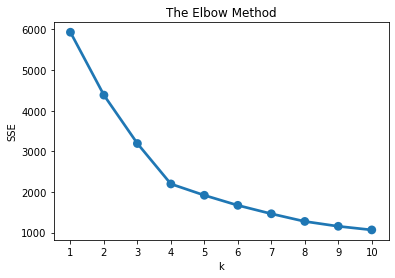

In [58]:
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_  # sum of squared distances to closest cluster center
#  Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.show()

The idea here is to look for the point at which the curve does not bend too much . From the graph the best number of cluster is 4

#### Using Distortion, Silhouette and Calinski Harabasz scores to confirm the cluster to be 4 

In [59]:
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

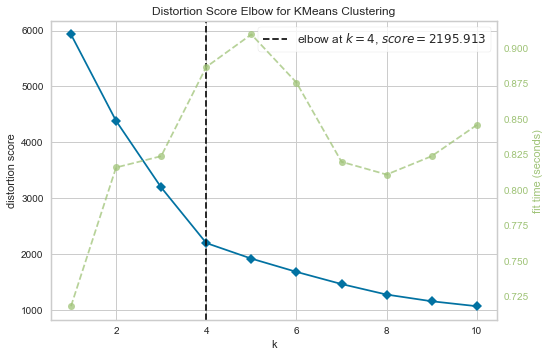

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# using yellowbrick to get an idea about the choice of K=5
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(datamart_normalized)        # Fit the data to the visualizer
visualizer.show()

#### Silhouette Score

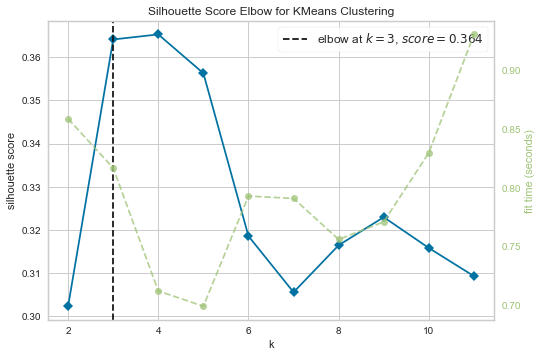

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [61]:
# using yellowbrick to get an idea about the choice of K=4
model = KMeans()

visualizer = KElbowVisualizer(
    model, k=11, metric='silhouette')

visualizer.fit(datamart_normalized)        # Fit the data to the visualizer
visualizer.show()

#### Calinski Harabasz Score

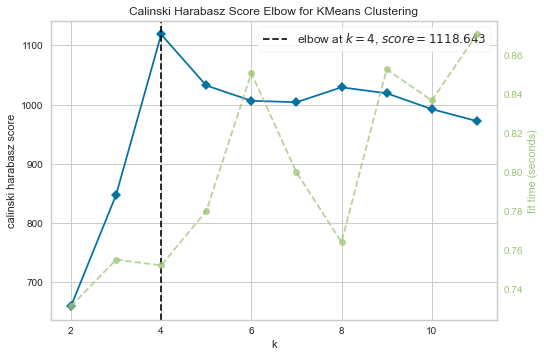

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [62]:
# using yellowbrick to get an idea about the choice of K=4
model = KMeans()

visualizer = KElbowVisualizer(
    model, k=11, metric='calinski_harabasz')

visualizer.fit(datamart_normalized)        # Fit the data to the visualizer
visualizer.show()

After testing the clusters, it is evident that the optimal number of clusters confirmed by the variuos tests is 4. I will therefore go ahead and instantiate the clusters to be 4

#### After identifying that there are 4 unique ways in which customers are patronizing XYZ, I will go ahead to group the data using the 4 clusters

In [63]:
### Instanstiating with cluster of 4

kmeans = KMeans(n_clusters=4, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(datamart_normalized)

# Extract cluster labels from labels_attribute
cluster_labels = kmeans.labels_

# Create a cluster label column in the original DataFrame
datamart_cluster5 = datamart.assign(Cluster = cluster_labels)

# Calculate average RFM values and size for each cluster
datamart_cluster5.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'AmountPaid':['mean','count'],
}).round(0)



Recency Frequency AmountPaid      
           mean      mean       mean count
Cluster                                   
0          45.0     211.0   182058.0   239
1         268.0      35.0    13622.0   371
2         123.0      82.0    67315.0   640
3         122.0      70.0    50125.0   727

These are the 4 clusters and their respective averages for Recency, Frequency and Amount paid.

Remember that the lower the recency, the better. The higher the frequency and amount paid, the better. 

Note : The "count" column shows the number of customers in each cluster

### Snake plot

The snake plot is used to visualize the clusters to better understand the identified patterns

In [64]:
datamart_normalized = pd.DataFrame(datamart_normalized, 
                                   index = KMeans_data.index,
                                  columns = KMeans_data.columns)
datamart_normalized['Cluster'] = datamart_cluster5['Cluster']

<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

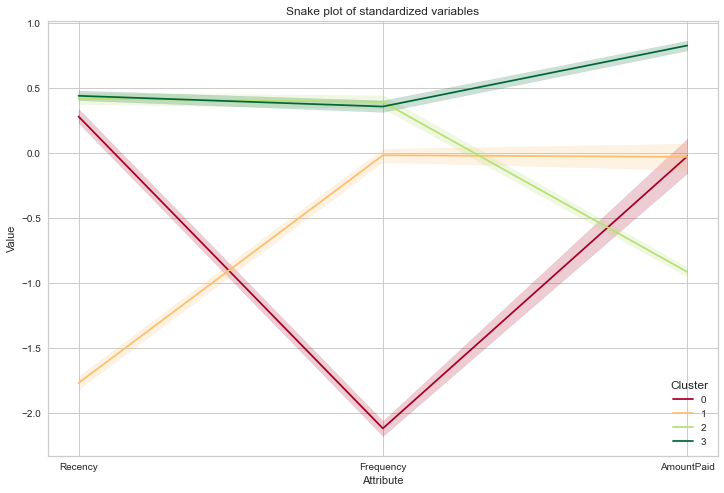

In [65]:
datamart_melt = pd.melt(datamart_normalized.reset_index(),
                       id_vars = ['Sell-to Customer No.','Cluster'],
                       value_vars = ['Recency', 'Frequency', 'AmountPaid'],
                       var_name = 'Attribute', value_name = 'Value')
plt.figure(figsize=(12,8))
plt.title('Snake plot of standardized variables')
sns.lineplot(x= 'Attribute', y='Value', hue='Cluster', data=datamart_melt, palette ='RdYlGn')

The snakeplot shows the patterns in behaviour of the various clusters with respect to their recency, frequency and amount paid.

### Relative Importance of Segment Attributes

In [66]:
cluster_avg = datamart_cluster5.groupby(['Cluster']).mean()
population_avg = KMeans_data.mean()
relative_imp = cluster_avg / population_avg - 1

relative_imp.round(2)

,AmountPaid,Frequency,RFM_Score,Recency
Cluster,,,,
0,-100427.42,5.87,NaN,0.92
1,-7515.37,0.13,NaN,10.38
2,-37133.13,1.67,NaN,4.23
3,-27650.89,1.28,NaN,4.20


In [67]:
datamart_cluster5

,Recency,Frequency,AmountPaid,R,F,M,RFM_Score,Cluster
Sell-to Customer No.,,,,,,,,
CUST000001,199,11,175.70,1,1,1,3,1
CUST000003,86,12,478.00,2,1,1,4,2
CUST000004,57,101,450433.87,3,3,4,10,2
CUST000005,8,654,203114.15,4,4,4,12,0
CUST000007,276,84,124786.30,1,3,4,8,3
...,...,...,...,...,...,...,...,...
DASPH000357,275,29,109603.72,1,2,4,7,3
DASPH000359,235,23,2466.11,1,2,1,4,2
DASPH000630,275,34,15892.80,1,2,3,6,3


In [68]:
KMeans_data

,Recency,Frequency,AmountPaid
Sell-to Customer No.,,,
CUST000001,-57,11,-81
CUST000003,86,12,-34
CUST000004,57,101,-127
CUST000005,8,-114,106
CUST000007,20,84,114
...,...,...,...
DASPH000357,19,29,35
DASPH000359,-21,23,-94
DASPH000630,19,34,20


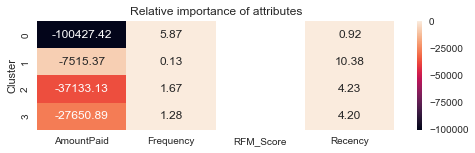

In [69]:
# Relative importance heatmap
plt.figure(figsize=(8,2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot =True, fmt='.2f')#, cmap='RdYlGn')
plt.show()

The further away the ratio is from 0, the more the contribution of the attribute in clustering customers to that group

In [70]:
datamart

,Recency,Frequency,AmountPaid,R,F,M,RFM_Score
Sell-to Customer No.,,,,,,,
CUST000001,199,11,175.70,1,1,1,3
CUST000003,86,12,478.00,2,1,1,4
CUST000004,57,101,450433.87,3,3,4,10
CUST000005,8,654,203114.15,4,4,4,12
CUST000007,276,84,124786.30,1,3,4,8
...,...,...,...,...,...,...,...
DASPH000357,275,29,109603.72,1,2,4,7
DASPH000359,235,23,2466.11,1,2,1,4
DASPH000630,275,34,15892.80,1,2,3,6


#### Grouping Customers into their respective clusters

In [71]:
final_clusters = datamart_cluster5[['Recency','Frequency','AmountPaid','Cluster']]
Cluster_0 = final_clusters[final_clusters['Cluster']==0]
Cluster_1 = final_clusters[final_clusters['Cluster']==1]
Cluster_2 = final_clusters[final_clusters['Cluster']==2]
Cluster_3 = final_clusters[final_clusters['Cluster']==3]

#### Analyzing cluster_0

In [72]:
Cluster_0

,Recency,Frequency,AmountPaid,Cluster
Sell-to Customer No.,,,,
CUST000005,8,654,203114.15,0
CUST000009,51,130,94016.16,0
CUST000014,60,133,113429.91,0
CUST000017,54,240,201221.58,0
CUST000028,16,186,46928.67,0
...,...,...,...,...
CUST005282,338,143,86823.16,0
CUST005380,16,1723,295896.89,0
CUST005382,226,930,76407.28,0


In [73]:
Cluster_0['AmountPaid'].sum()

43511815.15

In [74]:
Cluster_1['AmountPaid'].sum()

5053915.66

In [75]:
Cluster_2['AmountPaid'].sum()

43081531.28

In [76]:
Cluster_3['AmountPaid'].sum()

36440899.83

In [77]:
datamart_cluster5[datamart_cluster5['Cluster']==2]

,Recency,Frequency,AmountPaid,R,F,M,RFM_Score,Cluster
Sell-to Customer No.,,,,,,,,
CUST000003,86,12,478.00,2,1,1,4,2
CUST000004,57,101,450433.87,3,3,4,10,2
CUST000008,610,34,13247.64,1,2,3,6,2
CUST000012,23,59,7393.45,4,3,2,9,2
CUST000013,284,28,1704.00,1,2,1,4,2
...,...,...,...,...,...,...,...,...
DASPH000217,234,32,7338.37,1,2,2,5,2
DASPH000323,275,4,1522.20,1,1,1,3,2
DASPH000344,275,36,32451.79,1,2,4,7,2


value of each cluster   